In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#create string with the dataset filename
datafile = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [2]:
#open the file stream and store it
openfile = open(datafile,'r')

In [3]:
#load the vanilla DF from the CSV filedisplay(obj_df[col].display(obj_df[col].value_counts(normalize=True))value_counts(normalize=True))
churn_df = pd.read_csv(openfile)

In [4]:
#display the data head
churn_df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#display the data shape - (7043, 21)
churn_df.shape

(7043, 21)

In [6]:
#display the data types
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#display the number of unique values
churn_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
#describe the numerical data, it seems that SeniorCitizen is also categorical but is already encoded as 0/1
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#filter the columns index that are not OBJ
drop_int = churn_df.columns[churn_df.dtypes != object]
#churn_df.select_dtypes
drop_int

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [10]:
#drop int columns from DF and store in a new DF
obj_df = churn_df.drop(columns=drop_int)
#drop the customer ID
obj_df = obj_df.drop(columns='customerID')
churn_df = churn_df.drop(columns='customerID')
#next step is to generate Pies to visualize the categorical data

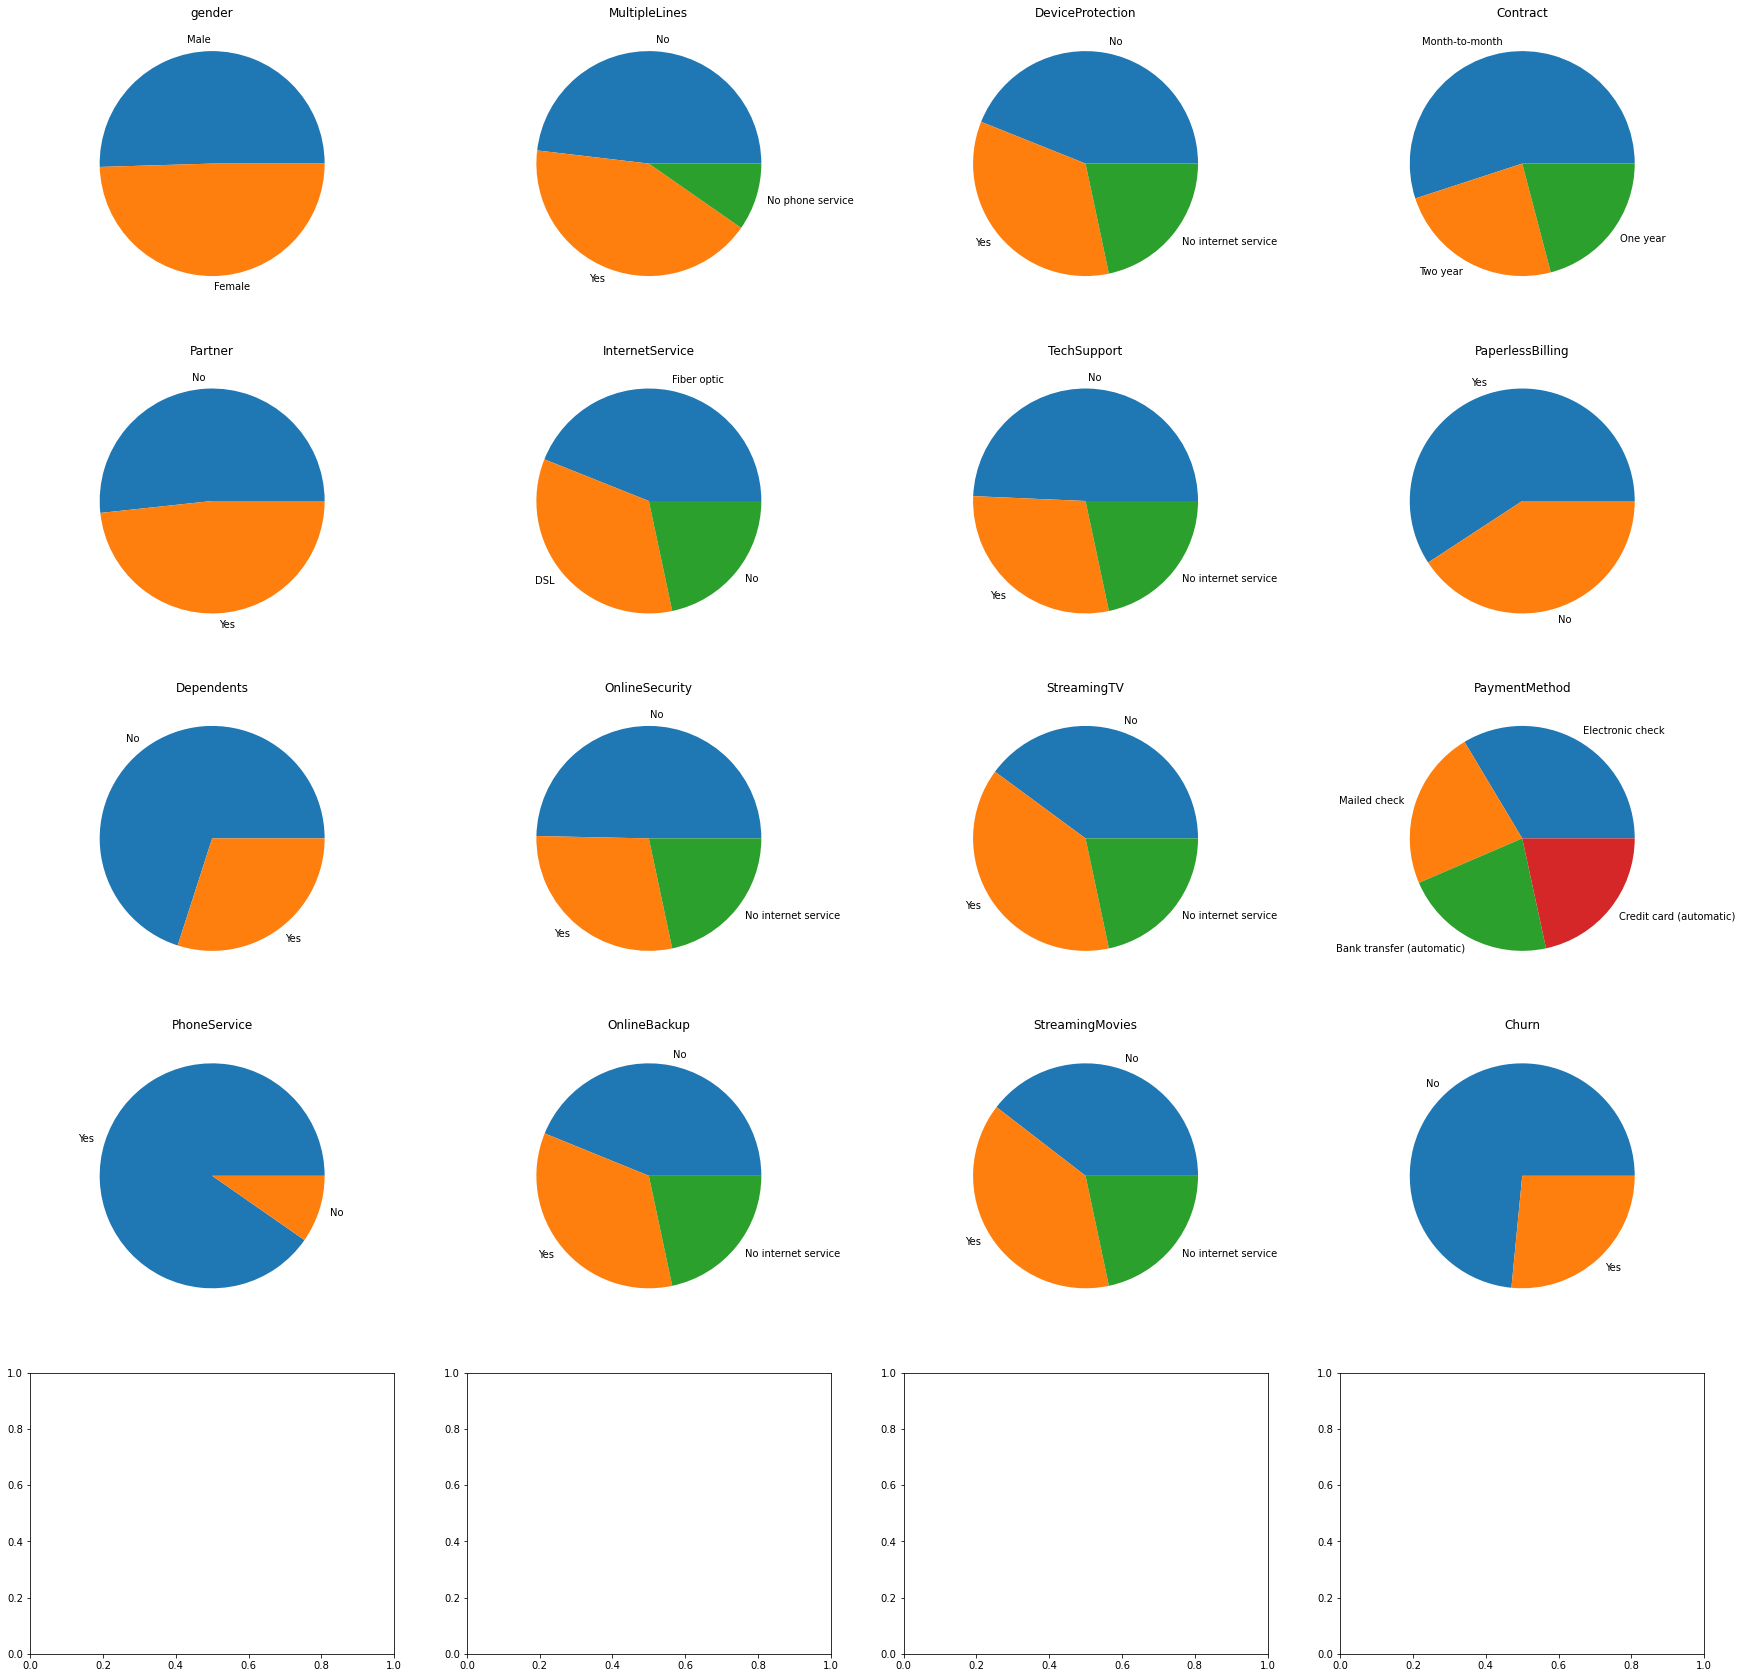

In [11]:
#display the features using pie chart
#create pre df with data that is pure 'object' drop Totalcharges since it will be converted to numerical feature
pie_df = obj_df.drop(columns='TotalCharges')
n=0
m=0
pie_obj = [pie_df.columns]
fig, pie_obj = plt.subplots(5,4,figsize=(30,30))
for col in pie_df.columns:
    if pie_df[col].dtype == 'object':
        obj_plot = pie_df[col].value_counts()
        pie_obj[n,m].set_title(col)
        pie_obj[n,m].pie(obj_plot,radius=1,labels=obj_df[col].value_counts().index)
        n+=1
        if n%4 == 0:
            m+=1
            n=0
#seems that "totalCharges" which should be numerical is an object and should be converted to numerical
#need to see how to improve the display by grid - done


In [12]:
#before converting TotalCharges from str to float - check for NA in TotalCharges
(obj_df['TotalCharges'] == ' ').sum()
#there are 11 empty string values in TotalCharges with the content of ' ' 

11

In [13]:
#transform the data from str to float in TotalCharges and replace blank with 'None'
churn_df['TotalCharges'].replace(to_replace=' ',value=None,inplace=True)
#convert the data type to float
churn_df.TotalCharges = churn_df.TotalCharges.astype(float)
churn_df['TotalCharges'].describe()

count    7043.000000
mean     2285.169963
std      2267.544511
min        18.800000
25%       401.675000
50%      1398.250000
75%      3803.050000
max      8684.800000
Name: TotalCharges, dtype: float64

In [14]:
#review the Dtypes after conversion
churn_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
#replace the nones with the Median of the feature
obj_df.TotalCharges.fillna(1398.25,inplace=True)

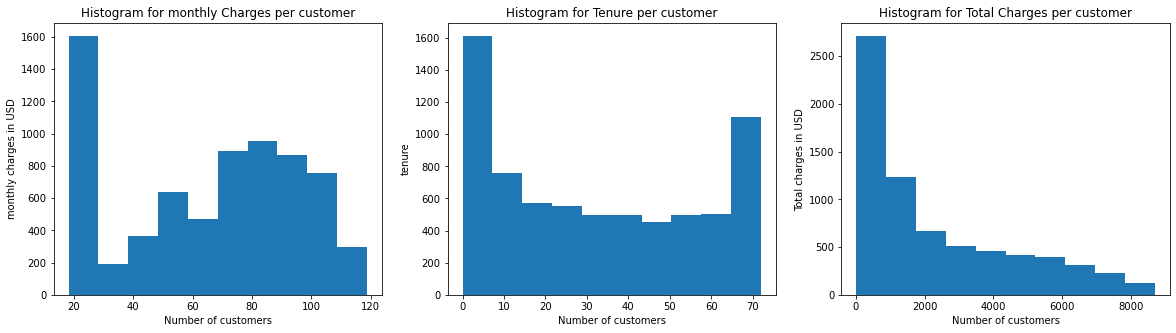

In [16]:
# plot the dist of the numerical features
fig, dist_obj = plt.subplots(1,3,figsize=(20,5))

dist_obj[0].hist(churn_df.MonthlyCharges)
dist_obj[0].set_title('Histogram for monthly Charges per customer')
dist_obj[0].set_xlabel('Number of customers')
dist_obj[0].set_ylabel('monthly charges in USD')
#we can see that the data is not normally dist

dist_obj[1].hist(churn_df.tenure)
dist_obj[1].set_title('Histogram for Tenure per customer')
dist_obj[1].set_xlabel('Number of customers')
dist_obj[1].set_ylabel('tenure')
#we can see that the data is not normally dist

dist_obj[2].hist(churn_df.TotalCharges)
dist_obj[2].set_title('Histogram for Total Charges per customer')
dist_obj[2].set_xlabel('Number of customers')
dist_obj[2].set_ylabel('Total charges in USD')
plt.show()
#data is skewed to the left



In [17]:
#import the quantile transformer from sklearn
from sklearn.preprocessing import QuantileTransformer

#run the transformations for each of the above numerical features that are not distributed normally
norm_trans_tc = QuantileTransformer(n_quantiles=churn_df['TotalCharges'].count(),output_distribution='normal')
tc_norm = pd.DataFrame(churn_df['TotalCharges'])
tc_norm = norm_trans_tc.fit_transform(tc_norm)

norm_trans_mc = QuantileTransformer(n_quantiles=churn_df['MonthlyCharges'].count(),output_distribution='normal')
mc_norm = pd.DataFrame(churn_df['MonthlyCharges'])
mc_norm = norm_trans_mc.fit_transform(mc_norm)

norm_trans = QuantileTransformer(n_quantiles=churn_df['tenure'].count(),output_distribution='normal')
tenure_norm = pd.DataFrame(churn_df['tenure'])
tenure_norm = norm_trans.fit_transform(tenure_norm)

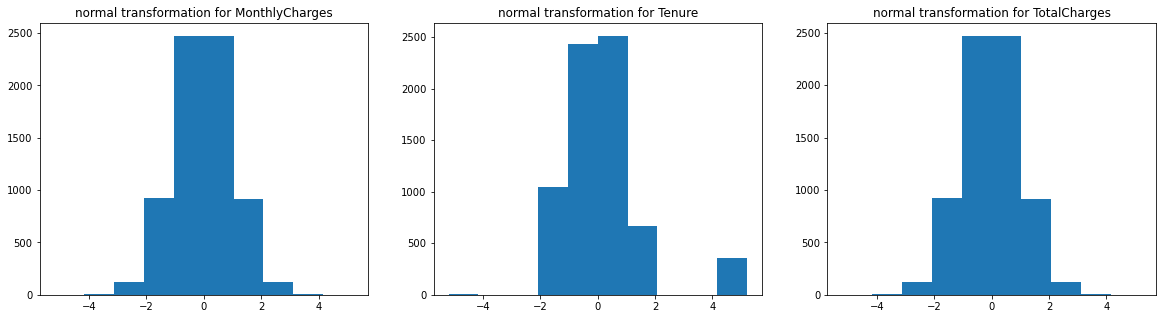

In [18]:
#plot the distributions of the transformations
f, norm_dist_obj = plt.subplots(1,3,figsize=(20,5))

norm_dist_obj[0].set_title('normal transformation for MonthlyCharges')
norm_dist_obj[0].hist(mc_norm)

norm_dist_obj[1].hist(tenure_norm)
norm_dist_obj[1].set_title('normal transformation for Tenure')

norm_dist_obj[2].hist(tc_norm)
norm_dist_obj[2].set_title('normal transformation for TotalCharges')
plt.show()

c:\Users\Pikuah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'BoxCox for TotalCharges'}, ylabel='Density'>

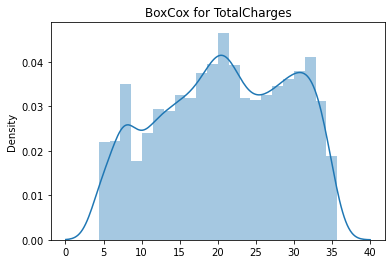

In [19]:
#perform normalization to the dist using boxcox for all numerical fetures
tc_bc_fit, tc_lambda_fit = stats.boxcox(churn_df.TotalCharges)
bc_tc = pd.DataFrame(tc_bc_fit)
plt.title('BoxCox for TotalCharges')
sns.distplot(bc_tc)

c:\Users\Pikuah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'BoxCox for MonthlyCharges'}, ylabel='Density'>

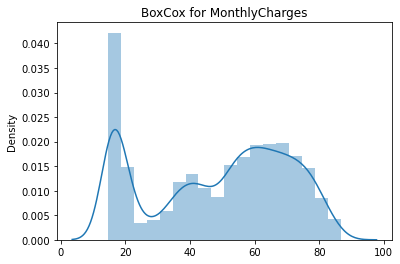

In [20]:
bc_mc_fit, mc_lambda_fit = stats.boxcox(churn_df.MonthlyCharges)
bc_mc = pd.DataFrame(bc_mc_fit)
plt.title('BoxCox for MonthlyCharges')
sns.distplot(bc_mc)

c:\Users\Pikuah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'BoxCox for MonthlyCharges'}, ylabel='Density'>

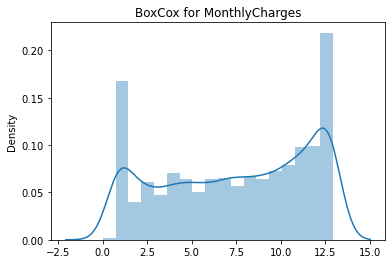

In [21]:
ten_bc_fit, ten_lambda_fit = stats.boxcox(churn_df['tenure']+1)
bc_ten = pd.DataFrame(ten_bc_fit)
plt.title('BoxCox for MonthlyCharges')
sns.distplot(bc_ten)

In [22]:
#apply transformations to Dataframe
churn_df['TotalCharges'] = tc_norm
churn_df['MonthlyCharges'] = mc_norm
churn_df['tenure'] = tenure_norm

In [23]:
churn_df[churn_df.tenure == 0]
#save to learn!

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [24]:
#encode the objects , run a loop on all df objects
import sklearn.preprocessing as pre

#create the encode class variable
encode_obj = pre.LabelEncoder()

#run the loop on all objects
for obj in churn_df.columns:
    if churn_df[obj].dtype == object:
        enc_obj = pd.DataFrame(encode_obj.fit_transform(churn_df[obj]))
        enc_obj
        churn_df[obj] = enc_obj
#display new dtypes for the DataFrame

churn_df.dtypes


gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure              float64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [25]:
#display the data after EDA and preprocessing - the data is scaled and noramlized
churn_df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,0.166692,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,0.000069,0.000012,0.265370
std,0.500013,0.368612,0.499748,0.458110,1.457765,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,1.002551,1.002619,0.441561
min,0.000000,0.000000,0.000000,0.000000,-5.199338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.199338,-5.199338,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-0.659373,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.674490,-0.674490,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.004093,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000712,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.663138,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.672927,0.674490,1.000000
max,1.000000,1.000000,1.000000,1.000000,5.199338,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,5.199338,5.199338,1.000000


In [26]:
#check corr with Churn - build data frame for corr with each feature
corr_df_churn = pd.DataFrame(churn_df.corrwith(churn_df.Churn),columns={'Correlation with Churn'})
corr_df_churn = corr_df_churn.abs()

corr_df_churn.sort_values(by='Correlation with Churn',ascending=False,inplace=True)
corr_df_churn.drop('Churn',inplace=True)
corr_df_churn

,Correlation with Churn
Contract,0.396713
tenure,0.305263
OnlineSecurity,0.289309
TechSupport,0.282492
TotalCharges,0.228544
OnlineBackup,0.195525
PaperlessBilling,0.191825
DeviceProtection,0.178134
Dependents,0.164221
MonthlyCharges,0.163793


In [27]:
#display the feature corr matrix in absolute values
corr_mat = churn_df.corr().abs()
corr_mat

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001874,0.001808,0.010517,0.002496,0.006488,0.006739,0.000863,0.015017,0.012057,0.000549,0.006825,0.006421,0.008743,0.000126,0.011754,0.017352,0.014555,0.006557,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,0.211185,0.010750,0.008576,0.146185,0.032310,0.128221,0.013632,0.021398,0.151268,0.030776,0.047266,0.142554,0.156530,0.038551,0.208226,0.103825,0.150889
Partner,0.001808,0.016479,1.000000,0.452676,0.338406,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,0.014877,0.154798,0.110354,0.341785,0.150448
Dependents,0.010517,0.211185,0.452676,1.000000,0.140068,0.001762,0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,0.111377,0.040292,0.097431,0.085570,0.164221
tenure,0.002496,0.010750,0.338406,0.140068,1.000000,0.011489,0.315338,0.030672,0.308411,0.328634,0.337331,0.296971,0.261923,0.271196,0.602054,0.012154,0.338611,0.276798,0.738250,0.305263
PhoneService,0.006488,0.008576,0.017706,0.001762,0.011489,1.000000,0.020538,0.387436,0.015198,0.024105,0.003727,0.019158,0.055353,0.043870,0.002247,0.016505,0.004184,0.185490,0.090443,0.011942
MultipleLines,0.006739,0.146185,0.142410,0.024991,0.315338,0.020538,1.000000,0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,0.176793,0.480095,0.461214,0.038037
InternetService,0.000863,0.032310,0.000891,0.044590,0.030672,0.387436,0.109216,1.000000,0.028416,0.036138,0.044944,0.026047,0.107417,0.098350,0.099721,0.138625,0.086140,0.288995,0.191851,0.047291
OnlineSecurity,0.015017,0.128221,0.150828,0.152166,0.308411,0.015198,0.007141,0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,0.157641,0.096726,0.022761,0.242369,0.289309
OnlineBackup,0.012057,0.013632,0.153130,0.091015,0.328634,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,0.013370,0.124847,0.150476,0.344426,0.195525


<AxesSubplot:>

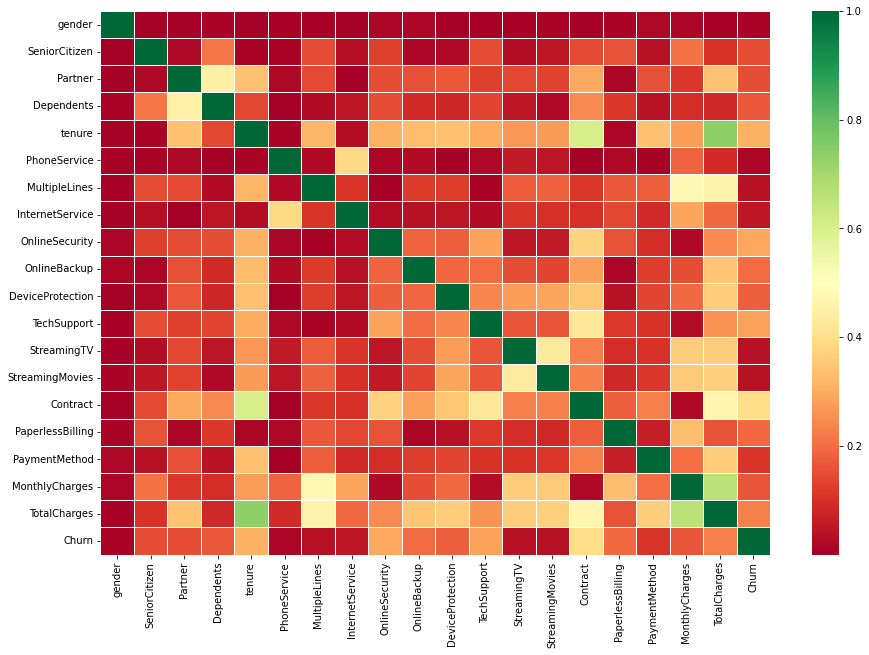

In [28]:
#display hitmap using SNS
#f, corr_plot = plt.subplot(figsize=(10,10))
plt.figure(figsize=(15,10))
corr_plot = sns.heatmap(corr_mat,cmap="RdYlGn",linewidths=.5)
corr_plot

In [30]:
#using lambda - example
#churn_df['MonthlyCharges'].apply(lambda x:x*x)

In [31]:
#run feature selection for the categorical features with the outcome of Churn(categorical as well) chi will run only on poisitive values, 

from sklearn.feature_selection import chi2, f_classif

x_cat = churn_df.select_dtypes(int)
y = churn_df['Churn']
x_cat.drop(columns='Churn',inplace=True)

chi_arr = chi2(x_cat,y)

x_cat.columns

chi2_matrix = pd.DataFrame({'features':x_cat.columns,'chi_score':chi_arr[0],'p-value':chi_arr[1]})

chi2_matrix.sort_values(by='chi_score',ascending=False)

c:\Users\Pikuah\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,features,chi_score,p-value
13,Contract,1115.780167,1.227941e-244
7,OnlineSecurity,551.611529,5.615882e-122
10,TechSupport,523.303866,8.086236e-116
8,OnlineBackup,230.086520,5.707869e-52
9,DeviceProtection,191.303140,1.651539e-43
1,SeniorCitizen,134.351545,4.576959e-31
3,Dependents,133.036443,8.876729e-31
14,PaperlessBilling,105.680863,8.661987e-25
2,Partner,82.412083,1.104764e-19
15,PaymentMethod,58.492250,2.040933e-14


In [32]:
#join the 2 matrices - 
corr_df_churn = corr_df_churn.join(chi2_matrix.set_index('features'))

In [33]:

#display relevant columns
corr_df_churn[{'Correlation with Churn','chi_score'}]

#create new DF with relevant columns
corr_rank = corr_df_churn[{'Correlation with Churn','chi_score'}]

#rank the correlation
corr_rank = corr_rank.dropna().rank()
#display the ranks
corr_rank

,chi_score,Correlation with Churn
Contract,16.0,16.0
OnlineSecurity,15.0,15.0
TechSupport,14.0,14.0
OnlineBackup,13.0,13.0
PaperlessBilling,9.0,12.0
DeviceProtection,12.0,11.0
Dependents,10.0,10.0
SeniorCitizen,11.0,9.0
Partner,8.0,8.0
PaymentMethod,7.0,7.0


Text(0.5, 1.0, 'Correlation rank - Chi vs Corr')

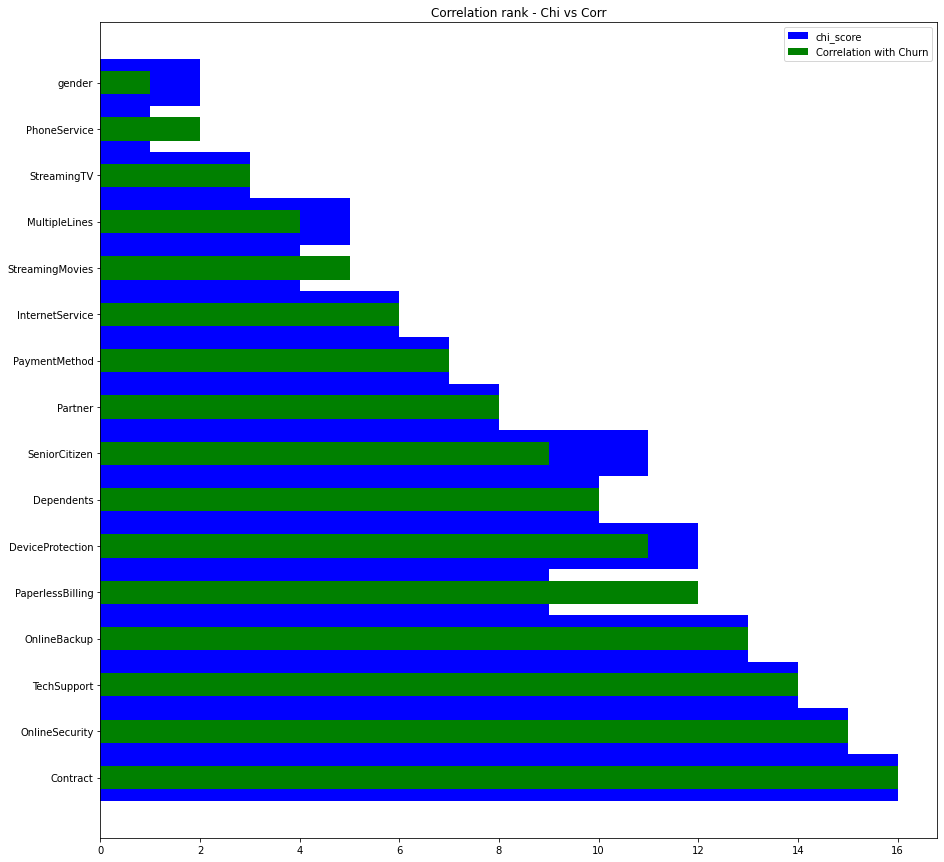

In [34]:
#plot the correlation ranks
_, axs = plt.subplots(figsize=(15,15))

plt.barh(corr_rank.index,corr_rank['chi_score'],color='b',height=1)
plt.barh(corr_rank.index,corr_rank['Correlation with Churn'],color='g',height=0.5)
plt.legend(corr_rank.columns)
plt.title('Correlation rank - Chi vs Corr')

In [35]:
#create feature combination streaming tv + streaming movies
#['No - 0' 'No internet service - 1' 'Yes - 2']
comb_feat = churn_df[{'StreamingTV','StreamingMovies'}]

comb_feat.insert(2,'streaming',churn_df['StreamingMovies'])

#replace the values on Yes for each of the features to yes for "streaming"
comb_feat.loc[(comb_feat[churn_df['StreamingMovies'] != churn_df['StreamingTV']]).index,'streaming'] = 2
#check the results of the replace
comb_feat[churn_df['StreamingMovies'] != churn_df['StreamingTV']]

c:\Users\Pikuah\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\Pikuah\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,StreamingTV,StreamingMovies,streaming
6,2,0,2
19,0,2,2
20,0,2,2
35,2,0,2
41,2,0,2
...,...,...,...
7021,2,0,2
7025,0,2,2
7028,2,0,2
7034,2,0,2


In [36]:
#check combined feature 'streaming' corr with predicted Churn
comb_feat['streaming'].corr(y)
#very low correlation - will not be considered in the model.

-0.010104058589715912

In [37]:
#drop YearlyCharges since they correlate with monthly charges and had missing values that were added sintethically
#run RFM for each customer - not feasible in this dataset
#drop features with chi score less than 58 - since less then 58 are very low in comparisson to others
#run logistic regrssion with confusion matrix and full metrics including AUC


In [38]:
#create the Data frames for model training 
x_model = churn_df.drop(columns='Churn')
y_model = pd.DataFrame(churn_df['Churn'])

x_model.drop(columns={'InternetService','MultipleLines','StreamingMovies','StreamingTV','gender','PhoneService','TotalCharges'},inplace=True)
x_model

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,1,0,-1.695233,0,2,0,0,0,1,2,-0.726816
1,0,0,0,0.124908,2,0,2,0,1,0,3,-0.268742
2,0,0,0,-1.251156,2,2,0,0,0,1,3,-0.371440
3,0,0,0,0.381375,2,0,2,2,1,0,0,-0.618121
4,0,0,0,-1.251156,0,0,0,0,0,1,2,0.018867
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,-0.127958,2,0,2,2,1,1,3,0.478224
7039,0,1,1,5.199338,0,2,2,0,1,1,1,1.301799
7040,0,1,1,-0.563027,2,0,0,0,0,1,2,-0.734253
7041,1,1,0,-0.981249,0,0,0,0,0,1,3,0.103590


In [39]:
#create the train and hold out set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_model,y_model,test_size=0.2)


In [40]:
#since the predicted variable is not uniform , remove samples using ClusterCentroids and feed them to the model
#from imblearn.under_sampling import ClusterCentroids

#cc = ClusterCentroids()

#x_train_ada, y_train_ada = cc.fit_resample(X_train,y_train)

#print(y_train.value_counts())
#print(y_train_ada.value_counts())

In [41]:
#train the model using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



#create the logistic regression class with solver=liblinear - the data set is not so big. 
log_reg = LogisticRegression(solver='liblinear',C=100,penalty='l1',class_weight='balanced')
#fit the model
log_reg.fit(X_train,y_train)

y_pred = pd.DataFrame(log_reg.predict(X_test))

#parameters = {
#    'penalty' : ['l1','l2'], 
#    'C'       : np.logspace(-3,3,7),
#    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
#}

#cv = GridSearchCV(log_reg,param_grid = parameters, scoring='accuracy',cv=10)
#cv.fit(X_train,y_train)
#cv.best_params_


c:\Users\Pikuah\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [42]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
print(classification_report(y_test,y_pred))
print("---------------------------------------------------")
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))
print("---------------------------------------------------")


              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1053
           1       0.48      0.81      0.61       356

    accuracy                           0.73      1409
   macro avg       0.70      0.76      0.70      1409
weighted avg       0.81      0.73      0.75      1409

---------------------------------------------------
F1 Score:  0.61
---------------------------------------------------


In [52]:
#create the coeff dataframe
coef_df = pd.DataFrame(X_train.columns ,columns=['Features'])



In [53]:
#display the coef DFrame
coef_df.insert(1,column='coef value',value=log_reg.coef_[0])
coef_df['coef value'] = coef_df['coef value'].abs()
coef_df.sort_values(by='coef value',ascending=False)

,Features,coef value
3,tenure,0.817144
11,MonthlyCharges,0.803055
8,Contract,0.772417
9,PaperlessBilling,0.397832
4,OnlineSecurity,0.304413
0,SeniorCitizen,0.270852
7,TechSupport,0.245324
2,Dependents,0.196663
5,OnlineBackup,0.129499
1,Partner,0.071887


Text(0.5, 69.0, 'Ground Truth')

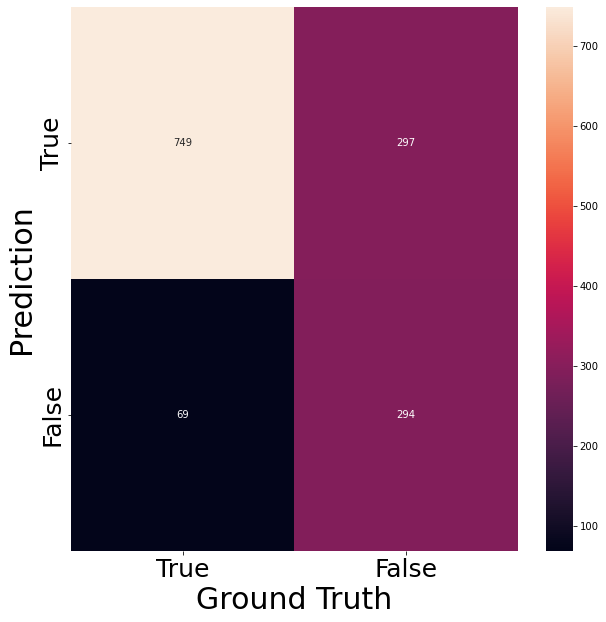

In [ ]:
#plot the confusion matrix
ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels[::-1], fontsize=25)
ax.set_yticklabels(labels[::-1], fontsize=25)
ax.set_ylabel('Prediction', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)